In [7]:
import os
from raphtory import Graph

# Specify the file path
binecode_path = "C:/ms_bincode/Graph_3"

# Load the file
if os.path.isfile(binecode_path):
    g3 = Graph.load_from_file(binecode_path)
    print(g3)
else:
    print(f"File does not exist: {binecode_path}")

Graph(number_of_edges=97252, number_of_vertices=26533, number_of_temporal_edges=159288593, earliest_time="7200000", latest_time="10799999")


In [1]:
import os
from raphtory import Graph

# Specify the file path
binecode_path = "C:/ms_bincode/Graph_4"

# Load the file
if os.path.isfile(binecode_path):
    g = Graph.load_from_file(binecode_path)
    print(g)
else:
    print(f"File does not exist: {binecode_path}")

Graph(number_of_edges=91201, number_of_vertices=25666, number_of_temporal_edges=145486068, earliest_time="10800000", latest_time="14399999")


Rank 1: MS_27421 with a score of 0.03349
Rank 2: MS_37691 with a score of 0.01615
Rank 3: MS_2827 with a score of 0.00588
Rank 4: MS_46825 with a score of 0.00504
Rank 5: MS_21537 with a score of 0.00335
Rank 6: MS_21883 with a score of 0.00315
Rank 7: MS_44585 with a score of 0.00285
Rank 8: MS_19585 with a score of 0.00211
Rank 9: MS_46708 with a score of 0.00203
Rank 10: MS_27487 with a score of 0.00185


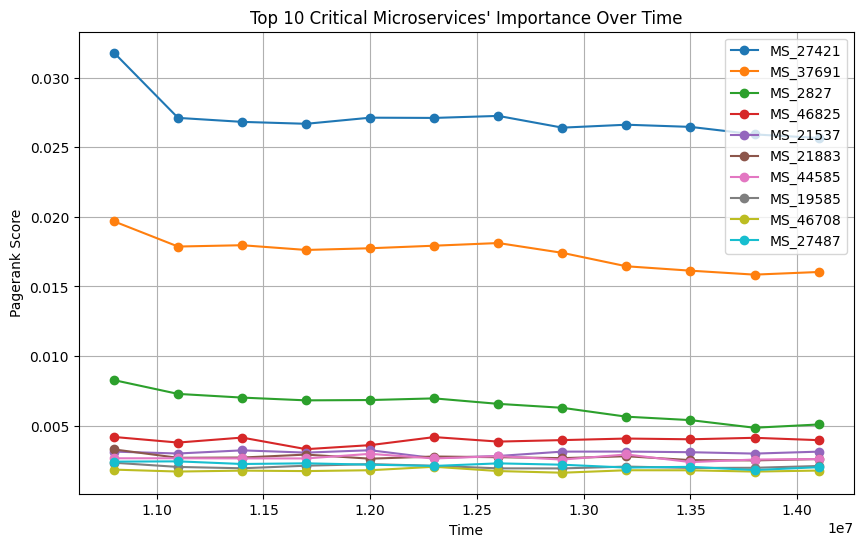

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from raphtory import algorithms as rp

# Get top 10 most important ms
results = rp.pagerank(g)
top_10 = results.top_k(10)

# Initialise a dictionary to store time and importance scores for each ms based on the data provided in pagerank()
service_data = {name: {'time': [], 'importance': []} for rank, (name, score) in enumerate(top_10, 1)}

# Iterate through the top 10 ms and collect their importance scores over time
for rank, (name, score) in enumerate(top_10, 1):
    print(f"Rank {rank}: {name} with a score of {score:.5f}")

    # Store for each ms the scores along with the corresponding time points.
    for windowed_graph in g.rolling(window=300000): # 5 minute window
        result = rp.pagerank(windowed_graph)
        service_data[name]['time'].append(windowed_graph.earliest_time)
        service_data[name]['importance'].append(result.get(str(name)))

# Set up the plot
plt.figure(figsize=(10, 6))

# Plot each ms' importance over time
for name, data in service_data.items():
    plt.plot(data['time'], data['importance'], marker="o", label=name)

plt.xlabel("Time")
plt.ylabel("Pagerank Score")
plt.title("Top 10 Critical Microservices' Importance Over Time")
plt.grid(True)
plt.legend()
plt.show()

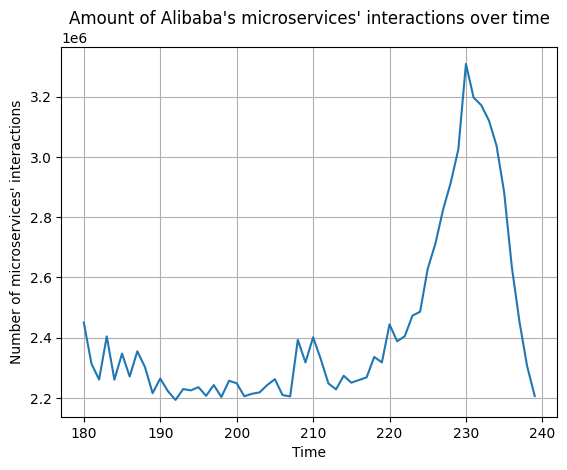

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
from raphtory import algorithms as rp
from raphtory import Graph

"""
Diagram which gives the number of microservices' interactions over time
"""

num_temp_edges = []
time = []

for windowed_graph in g.rolling(window=60000):
    result = windowed_graph.count_temporal_edges()
    num_temp_edges.append(result)
    time_in_minutes = windowed_graph.earliest_time / 60000
    time.append(time_in_minutes)

plt.plot(time, num_temp_edges)
plt.xlabel("Time")
plt.ylabel("Number of microservices' interactions")
plt.title("Amount of Alibaba's microservices' interactions over time")
plt.grid(True)

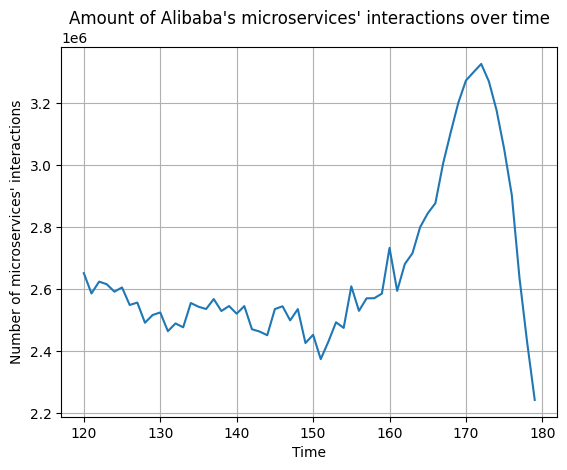

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
from raphtory import algorithms as rp
from raphtory import Graph

"""
Diagram which gives the number of microservices' interactions over time
"""

num_temp_edges = []
time = []

for windowed_graph in g3.rolling(window=60000):
    result = windowed_graph.count_temporal_edges()
    num_temp_edges.append(result)
    time_in_minutes = windowed_graph.earliest_time / 60000
    time.append(time_in_minutes)

plt.plot(time, num_temp_edges)
plt.xlabel("Time")
plt.ylabel("Number of microservices' interactions")
plt.title("Amount of Alibaba's microservices' interactions over time")
plt.grid(True)

In [22]:
from raphtory import algorithms as rp
from raphtory import Graph

start_time = 9600000 # Minute 160
end_time = 10799999 # Minute 180

g_spike = g3.window(start_time, end_time)

In [23]:
print(g_spike)

Graph(number_of_edges=80845, number_of_vertices=23004, number_of_temporal_edges=58178626, earliest_time="9600000", latest_time="10799998")


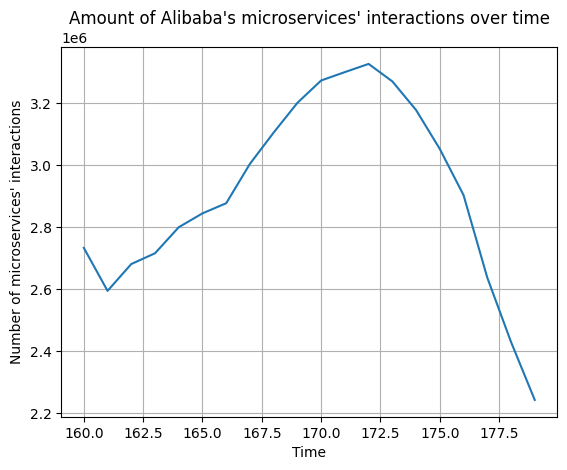

In [24]:
import matplotlib.pyplot as plt
import pandas as pd
from raphtory import algorithms as rp
from raphtory import Graph

"""
Diagram which gives the number of microservices' interactions over time
"""

num_temp_edges = []
time = []

for windowed_graph in g_spike.rolling(window=60000):
    result = windowed_graph.count_temporal_edges()
    num_temp_edges.append(result)
    time_in_minutes = windowed_graph.earliest_time / 60000
    time.append(time_in_minutes)

plt.plot(time, num_temp_edges)
plt.xlabel("Time")
plt.ylabel("Number of microservices' interactions")
plt.title("Amount of Alibaba's microservices' interactions over time")
plt.grid(True)